<a href="https://colab.research.google.com/github/zainoor/LabTI_KecerdasanArtifical/blob/main/lfw_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gdown
!gdown --folder "https://drive.google.com/drive/folders/1T6A11k1kyqTkwk9j8EEdDAxm3Qj5qden?usp=drive_link" -O /content/lfw

Retrieving folder contents
Retrieving folder 12vqXFl4X1J-g8-QyYbH8iGwp7Mn9I_OP lfw
Processing file 13KmBjsBaIvXysFGNnUiCGIquFh1LEEx_ pairs.txt
Processing file 13F8NTas7xSP2fT30zMBEZh1al2OKMf7_ pairsDevTest.txt
Processing file 1348MSURZMlPPooU6Rdk1lNvUm3z_e4wy pairsDevTrain.txt
Processing file 12z3AhWVKg6WfPAiV4ouO4bvlHZF5vXIL lfw-funneled.tgz
Processing file 12sNHo7_7QLQ7t3KTdJczgAWilqUySHs0 lfw.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=13KmBjsBaIvXysFGNnUiCGIquFh1LEEx_
To: /content/lfw/lfw/pairs.txt
100% 155k/155k [00:00<00:00, 5.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=13F8NTas7xSP2fT30zMBEZh1al2OKMf7_
To: /content/lfw/lfw/pairsDevTest.txt
100% 26.0k/26.0k [00:00<00:00, 63.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1348MSURZMlPPooU6Rdk1lNvUm3z_e4wy
To: /content/lfw/lfw/pairsDevTrain.txt
100% 56.6k/56.6k [00:00<00:00, 64.0MB/s]
Downl

In [ ]:
import tarfile
import os

# Tentukan path ke folder yang telah diunduh dan file .tgz
download_path = '/content/lfw'
lfw_funneled_path = os.path.join(download_path, 'lfw-funneled.tgz')
extract_path = '/content/lfw_data'

# Periksa apakah `lfw-funneled.tgz` ada dan ekstrak file
if os.path.exists(lfw_funneled_path):
    with tarfile.open(lfw_funneled_path, 'r:gz') as tar_ref:
        tar_ref.extractall(extract_path)
    print("Files extracted successfully.")
else:
    print("`lfw-funneled.tgz` not found.")


Files extracted successfully.


In [ ]:
# Memperlihatkan isi directory
print("Files in extracted directory:", os.listdir(extract_path))


Files in extracted directory: ['lfw_funneled']


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Tentukan target ukuran gambar
target_size = (64, 64)

# Memuat gambar
image_data = []
num_loaded_images = 0
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Mendfinisikan ekstensi file yang di perlukan
            img_path = os.path.join(root, file)
            try:
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0  # Normalisasi ke [0, 1]
                image_data.append(img_array)
                num_loaded_images += 1
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# Ubah ke array numpy dan periksa bentuknya
image_data = np.array(image_data)
print(f"Loaded {num_loaded_images} images.")
print("Image data shape:", image_data.shape)


Loaded 13233 images.
Image data shape: (13233, 64, 64, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
autoencoder.fit(image_data, image_data, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 135s 348ms/step - loss: 0.0305 - val_loss: 0.0087
Epoch 2/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 139s 344ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 3/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 141s 342ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 4/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 127s 341ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 5/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 133s 358ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 6/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 138s 348ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 7/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 141s 346ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 8/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 142s 346ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 9/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 141s 343ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 10/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 142s 344ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 11/50
373/373 ━━━━━━━━━━━━━━━━━━━━ 143s 346ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


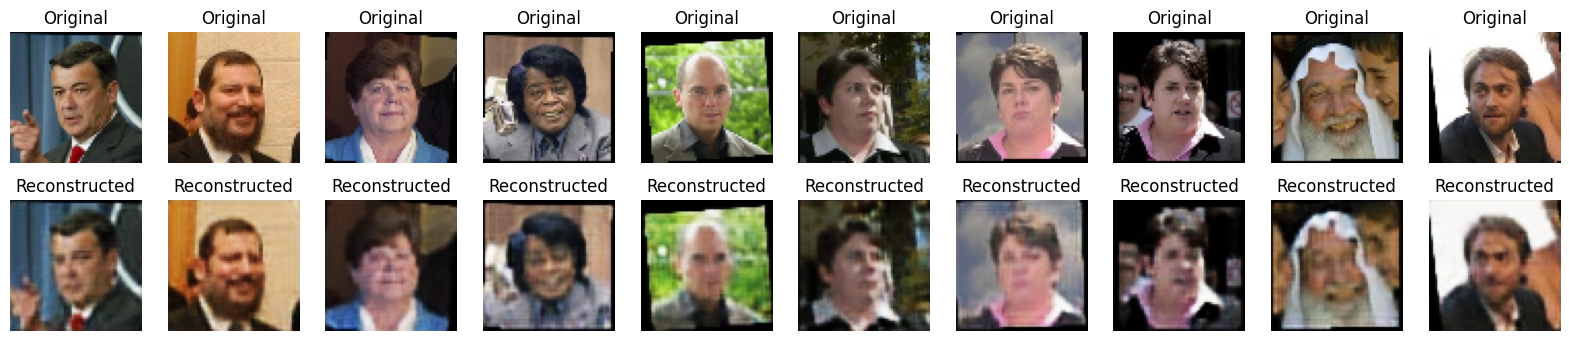

In [ ]:
import matplotlib.pyplot as plt

# Encode and decode beberapa gambar
decoded_imgs = autoencoder.predict(image_data[:10])

n = 10  # banyak gambar yang di display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_data[i])
    plt.title("Original")
    plt.axis("off")

    # Display gambar yang di rekonstruksi
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
